# ASHITA K
# INTERMEDIATE LEVEL TASK 6:
# Prediction using Decision Tree  Algorithm
# The Sparks Foundation GRIP-JAN 2022 (Data Science and Business Analytics Intern)

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import pydotplus
from sklearn.tree import export_graphviz

# Importing the dataset

In [2]:
df = pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.shape

(150, 6)

In [7]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# Preprocessing the dataset

In [8]:
df.isna().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [9]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
df=df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Exploratory data analysis

<AxesSubplot:xlabel='SepalWidthCm'>

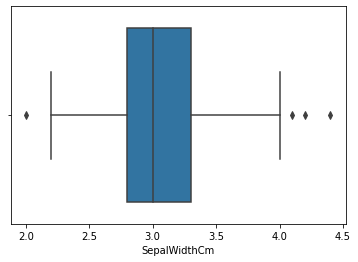

In [11]:
sns.boxplot(x='SepalWidthCm', hue='Species', data=df)

<AxesSubplot:xlabel='SepalLengthCm'>

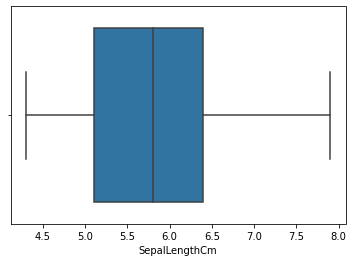

In [12]:
sns.boxplot(x='SepalLengthCm', hue='Species', data=df)

<AxesSubplot:xlabel='PetalWidthCm'>

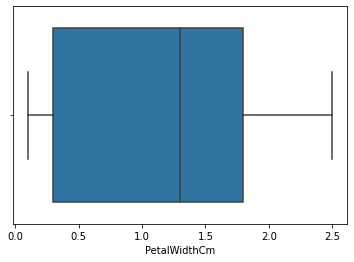

In [13]:
sns.boxplot(x='PetalWidthCm', hue='Species', data=df)

<AxesSubplot:xlabel='PetalWidthCm'>

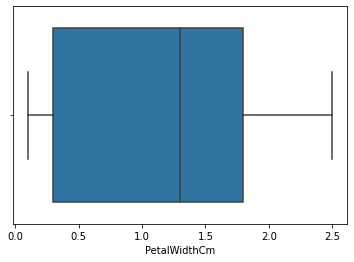

In [14]:
sns.boxplot(x='PetalWidthCm', hue='Species', data=df)

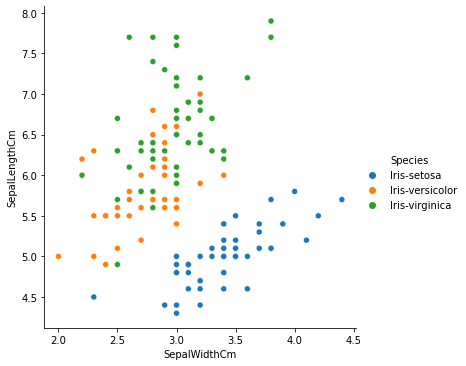

In [15]:
sns.relplot(x='SepalWidthCm', y='SepalLengthCm', hue='Species', data=df)

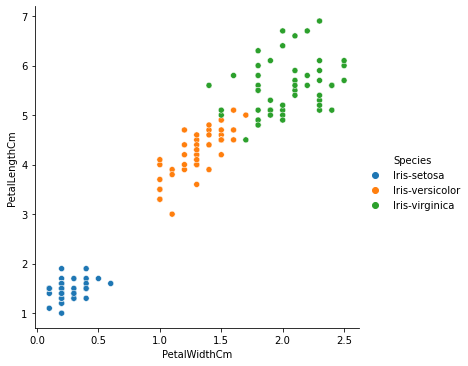

In [16]:
sns.relplot(x='PetalWidthCm', y='PetalLengthCm', hue='Species', data=df)

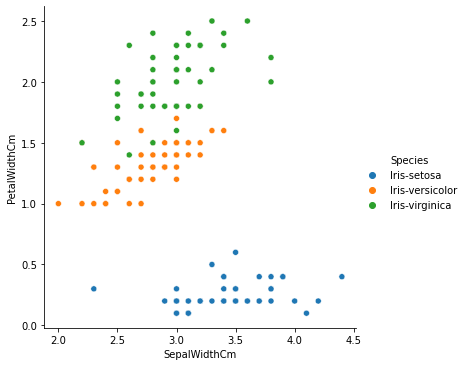

In [17]:
sns.relplot(x='SepalWidthCm', y='PetalWidthCm', hue='Species', data=df)

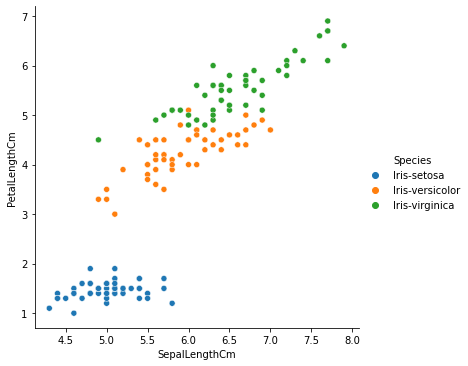

In [18]:
sns.relplot(x='SepalLengthCm', y='PetalLengthCm', hue='Species', data=df)

<AxesSubplot:xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

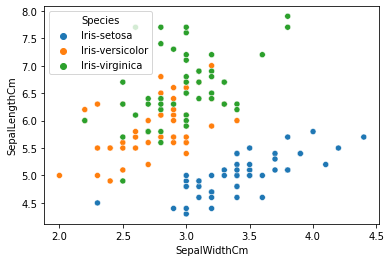

In [19]:
sns.scatterplot(x='SepalWidthCm', y='SepalLengthCm', hue='Species', data=df)

<AxesSubplot:xlabel='PetalWidthCm', ylabel='PetalLengthCm'>

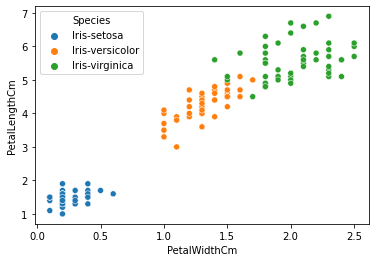

In [20]:
sns.scatterplot(x='PetalWidthCm', y='PetalLengthCm', hue='Species', data=df)

<AxesSubplot:xlabel='SepalWidthCm', ylabel='PetalWidthCm'>

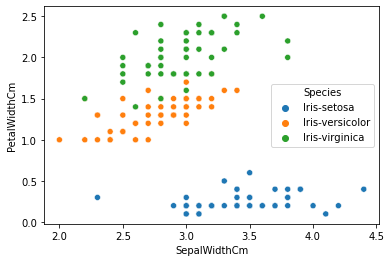

In [21]:
sns.scatterplot(x='SepalWidthCm', y='PetalWidthCm', hue='Species', data=df)

<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

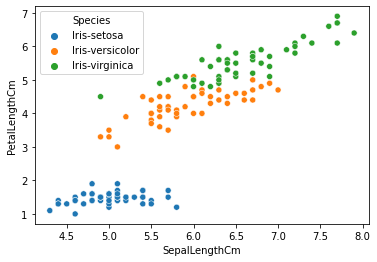

In [22]:
sns.scatterplot(x='SepalLengthCm', y='PetalLengthCm', hue='Species', data=df)

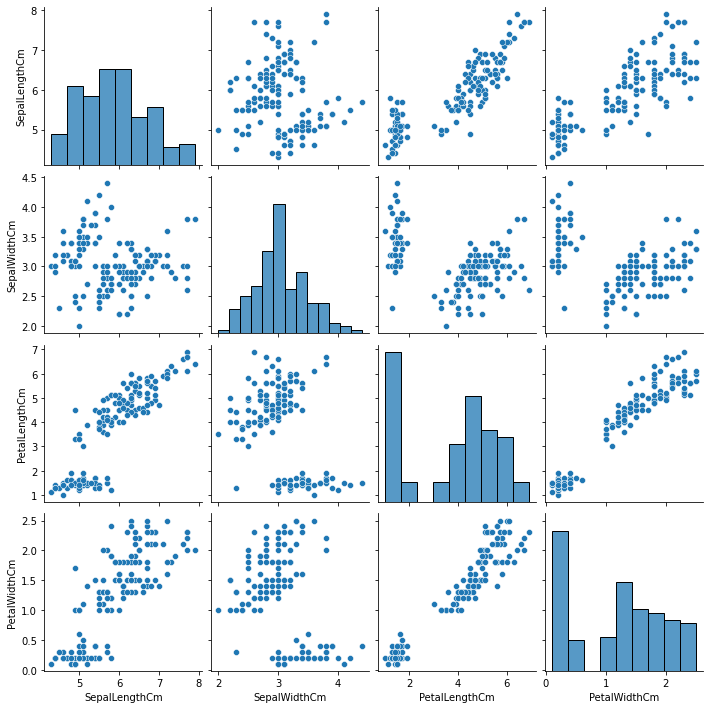

In [23]:
sns.pairplot(df)

# Data Visualization using Decision Tree Classifier

In [24]:
dtc=DecisionTreeClassifier()

In [31]:
x=df.drop(['Species'], axis=1)
y=df['Species']
X_train, Y_train, X_test, Y_test = train_test_split(x, y, random_state=100, test_size=0.3)

In [26]:
dtc.fit(x,y)

DecisionTreeClassifier()

In [27]:
dtc1=DecisionTreeClassifier().fit(x,y)

[Text(167.4, 199.32, 'Petal width <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = Setosa'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = Setosa'),
 Text(193.15384615384616, 163.07999999999998, 'Petal width <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = Versicolor'),
 Text(103.01538461538462, 126.83999999999999, 'Petal length <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = Versicolor'),
 Text(51.50769230769231, 90.6, 'Petal width <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = Versicolor'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = Versicolor'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Virginica'),
 Text(154.52307692307693, 90.6, 'Petal width <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = Virginica'),
 Text(128.76923076923077, 54.35

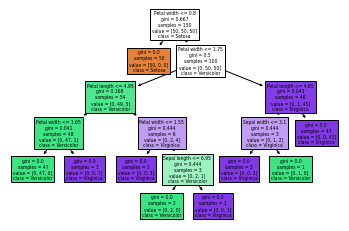

In [28]:
f_n = ["Sepal length", "Sepal width", "Petal length", "Petal width"]
c_n = ["Setosa", "Versicolor", "Virginica"]
plot_tree(dtc, feature_names = f_n, class_names = c_n, filled=True)

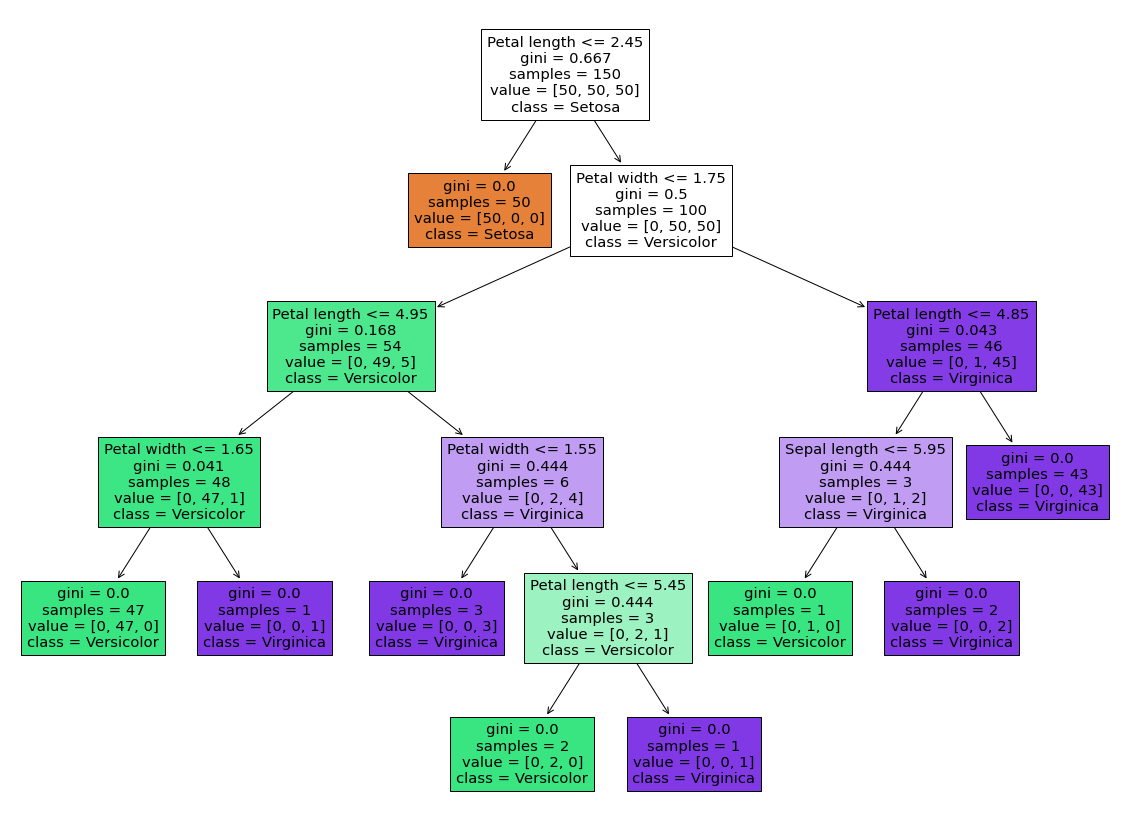

In [29]:
plt.figure(figsize=(20,15))
decision_tree = tree.plot_tree(dtc1, feature_names = f_n, class_names = c_n, filled = True)